<a href="https://colab.research.google.com/github/DaverArenas/DeepLearning_ImageClassification/blob/main/EvaluacionPunto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Crear configuración de API

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!mkdir -p ~/.aws &&\
  cp /content/drive/My\ Drive/AWS/credencials.txt ~/.aws/credentials

In [3]:
pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import boto3
comprehend = boto3.client(service_name='comprehend', region_name="us-east-2")
text = "La izquierda es comunista"
comprehend.detect_sentiment(Text=text, LanguageCode='es')

In [ ]:
!pip install selenium

In [ ]:
!apt-get update
!apt install chromium-chromedriver

In [50]:
import os, sys, time
import json, requests, shutil
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

from PIL import Image
import hashlib
import urllib
from binascii import a2b_base64
import matplotlib.pyplot as plt
import io
from selenium.webdriver.common.by import By

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [51]:
def scraping(searchtext,download_path, num_requested=1000):
  number_of_scrolls = num_requested / 400 + 1 # En cada scroll se pueden descargar 400 imágenes
  download_path=download_path + searchtext.replace(" ", "_")
  if not os.path.exists(download_path + searchtext.replace(" ", "_")):
    os.makedirs(download_path + searchtext.replace(" ", "_"))

  url = f'https://www.google.co.in/search?q={searchtext}&source=lnms&tbm=isch'
  
  #driver = webdriver.Chrome('D:/Install/chromedriver.exe')
  #Opción en colab
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  driver =webdriver.Chrome('chromedriver',options=chrome_options)
  ########################################################################
  #driver = webdriver.Firefox()
  
  driver.get(url)

  headers = {}
  img_count = 0
  downloaded_img_count = 0
  
  for _ in range(int(number_of_scrolls)):
    for __ in range(10): # Varios scrolls internos para mostrar las 400 imágenes de uno.
      driver.execute_script("window.scrollBy(0, 1000000)")
      time.sleep(0.2)
    time.sleep(0.5) # descargar las próximas 400 imágenes
  #sub = driver.find_elements_by_tag_name('img')
  sub = driver.find_elements(By.TAG_NAME, 'img')
  listImages = []
  for image in sub:
    if image.get_attribute('src')!=None:
      listImages.append(image.get_attribute('src'))   
  driver.quit()
  return listImages

In [52]:
searchtext='Juan Carlos Guerrero Sierra'
##searchtext='Ian García lunar lander challenge'
num_requested=1000
download_path='/content/drive/MyDrive/FotosGoogleScraping'

In [53]:
lista=scraping(searchtext,download_path=download_path)

In [ ]:
lista

''
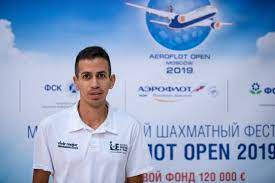

In [59]:
lista[10]

In [61]:
urllib.request.urlretrieve(lista[10], "/content/drive/MyDrive/ScrapingJuanCarlos/foto1_juan.jpg")

('/content/drive/MyDrive/ScrapingJuanCarlos/foto1_juan.jpg',
 <email.message.Message at 0x7f35175022d0>)

## Análisis de imágenes

Vamos a utilizar el servicio Rekognition

In [5]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

##DEFINIMOS UNA IMAGEN FUENTE PARA HACER LA COMPARACIÓN CON  LAS IMAGENES QUE ENCONTRAMOS EN INTERNET

In [125]:
face_JuanOficial = '/content/drive/MyDrive/fotoOficialJuanCarlos/FotoJuanOficial.jpg'

Se debe llamar al servicio ***rekognition***

In [6]:
client = boto3.client(service_name='rekognition', region_name="us-east-2")

Hacer una función para leer la imagen en formato binario

In [7]:
def openImage(file_image):
  with open(file_image, 'rb') as openfile:
    content = openfile.read()
  return content

In [8]:
!pip install piexif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import piexif

##VALIDAMOS QUE LA IMAGEN FUENTE SE HAYA CARGADO CON EXITO

In [126]:
image=openImage(face_JuanOficial)
response = client.detect_faces(Image={'Bytes': image}, Attributes=["ALL"])

In [127]:
##Coordenadas a la cara calculadas por la API de AWS
response['FaceDetails'][0]['BoundingBox']

{'Height': 0.5413227081298828,
 'Left': 0.34023037552833557,
 'Top': 0.19382528960704803,
 'Width': 0.2420501410961151}

In [129]:
response

{'FaceDetails': [{'AgeRange': {'High': 39, 'Low': 29},
   'Beard': {'Confidence': 91.49504089355469, 'Value': True},
   'BoundingBox': {'Height': 0.5413227081298828,
    'Left': 0.34023037552833557,
    'Top': 0.19382528960704803,
    'Width': 0.2420501410961151},
   'Confidence': 99.99982452392578,
   'Emotions': [{'Confidence': 40.117774963378906, 'Type': 'HAPPY'},
    {'Confidence': 16.307785034179688, 'Type': 'SURPRISED'},
    {'Confidence': 14.77090835571289, 'Type': 'CALM'},
    {'Confidence': 13.687914848327637, 'Type': 'CONFUSED'},
    {'Confidence': 9.294276237487793, 'Type': 'ANGRY'},
    {'Confidence': 7.05689811706543, 'Type': 'FEAR'},
    {'Confidence': 4.976012706756592, 'Type': 'DISGUSTED'},
    {'Confidence': 2.7547905445098877, 'Type': 'SAD'}],
   'Eyeglasses': {'Confidence': 97.4463119506836, 'Value': False},
   'EyesOpen': {'Confidence': 98.31954956054688, 'Value': True},
   'Gender': {'Confidence': 99.37925720214844, 'Value': 'Male'},
   'Landmarks': [{'Type': 'eyeL

In [128]:
for faceDetail in response['FaceDetails']:
  print('La edad está entre ' + str(faceDetail['AgeRange']['Low']) + ' y ' + str(faceDetail['AgeRange']['High']) + ' años')

La edad está entre 29 y 39 años


In [134]:
import cv2
import matplotlib.pyplot as plt
img = plt.imread(face_JuanOficial)
#img=cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
imgWidth = img.shape[1]
imgHeight = img.shape[0]
box=response['FaceDetails'][0]['BoundingBox']
left = int(imgWidth * box['Left'])
top = int(imgHeight * box['Top'])
width = int(imgWidth * box['Width'])
height = int(imgHeight * box['Height'])
img=cv2.rectangle(img,(left,top),(left+width,top+height),(255,0,0),8)

##ESTA SERA LA IMAGEN OFICIAL PARA REALIZAR LAS COMPARACIONES

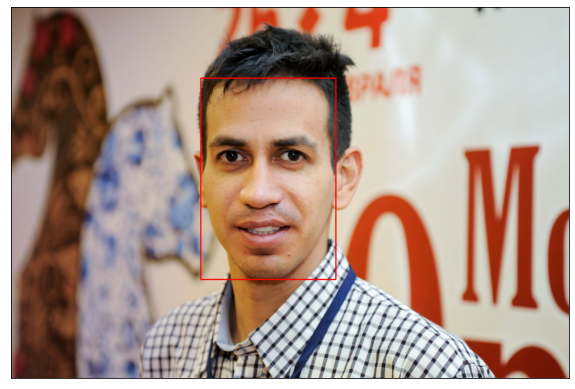

In [135]:
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(img)

Función para rotar la imagen si tiene el parámetro de rotación

In [19]:
def rotate(filename):
  exif_dict = piexif.load(filename)
  img = plt.imread(filename)
  if piexif.ImageIFD.Orientation in exif_dict["0th"]:
      orientation = exif_dict["0th"][piexif.ImageIFD.Orientation]
      print(orientation)
      if orientation == 3:# 180 grados
          return cv2.rotate(img, cv2.ROTATE_180)
      elif orientation == 6: # 90 grados
          return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
      elif orientation == 8:#270
          return cv2.rotate(img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
      else:
          return img
  else:
      return img

Función para trazar un rectángulo en la zona detectada. Se le pasa la imagen y el box que contiene las coordenadas.

Esta nos puede servir para dibujar el rectángulo dada las coordenadas de detección de rostro o de objetos.

In [95]:
def rectFace(img,box):
  imgWidth = img.shape[1]
  imgHeight = img.shape[0]
  left = int(imgWidth * box['Left'])
  top = int(imgHeight * box['Top'])
  width = int(imgWidth * box['Width'])
  height = int(imgHeight * box['Height'])
  img_rotate=cv2.rectangle(img,(left,top),(left+width,top+height),(255,0,0),2)
  return img, [left, top, left+width, top+height]

Función para detectar rostros. Todos los rostros que sean detectados

In [77]:
def detectface(client, filename):
  image=openImage(filename)
  response=client.detect_faces(Image={'Bytes': image}, Attributes=["ALL"])
  #img = plt.imread(filename)
  img = rotate(filename)
  faces=response['FaceDetails']
  for f in faces:
    box = f['BoundingBox']
    img,_=rectFace(img,box)
  return img 

## Comparación de rostros

La función ***compare_face*** permite comparar un rostro de una imagen pasada en el parámtro *SourceImage*, en otra imagen pasada como parámetro en *TargetImage*

##CARGAMOS LAS FUNCIONES QUE NECESITAMOS

In [24]:
import matplotlib.pyplot as plt
import cv2

Función para encontrar el rostro de la imagen *SourceImage*

In [88]:
def compareFaces(fileSource, fileTarget):
  image1=openImage(fileSource)
  image2=openImage(fileTarget)
  response=client.compare_faces(TargetImage={'Bytes': image2}, SourceImage={'Bytes': image1})
  faces=response['FaceMatches']
  box=response['FaceMatches'][0]['Face']['BoundingBox']
  image1=rotate(fileSource)
  img = rotate(fileTarget)
  img,_=rectFace(img,box)
  return image1,img

##CON LA SIGUIENTE FUNCIÓN GUARDAMOS EN UN DIRECTORIO LAS IMAGENES QUE ENCONTRAMOS EN EL WEB SCRAPING

In [97]:
x=1
for files in lista:
  if files.startswith('data:image'):
    urllib.request.urlretrieve(files, f'/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave{x}.jpg')
    x += 1
  else:
    print('NO ES VALIDO')

NO ES VALIDO
NO ES VALIDO
NO ES VALIDO
NO ES VALIDO
NO ES VALIDO
NO ES VALIDO
NO ES VALIDO
NO ES VALIDO
NO ES VALIDO
NO ES VALIDO
NO ES VALIDO
NO ES VALIDO
NO ES VALIDO
NO ES VALIDO
NO ES VALIDO
NO ES VALIDO
NO ES VALIDO


In [98]:
path_directory = '/content/drive/MyDrive/ScrapingJuanCarlos'

##CREAMOS UNA LISTA CON LA RUTA DE TODAS LAS IMAGENES DEL WEB SCRAPING

In [102]:
list_of_images = []
x = 0
for i in os.listdir(path_directory):
  list_of_images.append(f'/content/drive/MyDrive/ScrapingJuanCarlos/{i}')

##SE RECUPERARON LAS SIGUIENTES IMAGENES DEL WEB SCRAPING

In [103]:
list_of_images

['/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave1.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave2.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave3.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave4.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave5.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave6.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave7.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave8.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave9.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave10.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave11.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave12.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave13.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave14.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave15.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/image

##HACEMOS UNA PRUEBA PARA VERIFICAR QUE LAS IMAGENES SE DESCARGARON Y SE ALMACENARON CORRECTAMENTE

In [104]:
image=openImage(list_of_images[4])
response = client.detect_faces(Image={'Bytes': image}, Attributes=["ALL"])

In [105]:
for faceDetail in response['FaceDetails']:
  print('La edad está entre ' + str(faceDetail['AgeRange']['Low']) + ' y ' + str(faceDetail['AgeRange']['High']) + ' años')

La edad está entre 23 y 33 años


In [106]:
import cv2
import matplotlib.pyplot as plt
img = plt.imread(list_of_images[4])
#img=cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
imgWidth = img.shape[1]
imgHeight = img.shape[0]
box=response['FaceDetails'][0]['BoundingBox']
left = int(imgWidth * box['Left'])
top = int(imgHeight * box['Top'])
width = int(imgWidth * box['Width'])
height = int(imgHeight * box['Height'])
img=cv2.rectangle(img,(left,top),(left+width,top+height),(255,0,0),2)

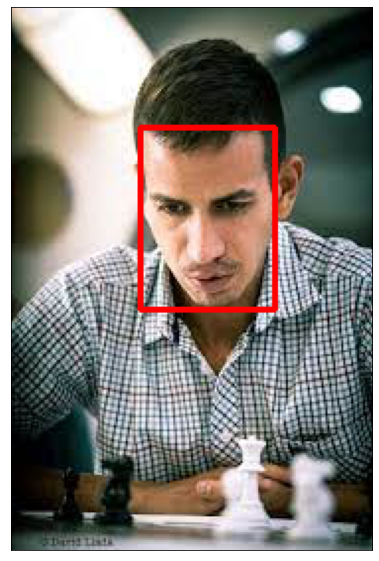

In [107]:
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(img)

## Comparación de rostros

##1. VERIFICAMOS QUE LAS IMAGENES QUE ESTAMOS DESCARGANDO DEL SCRAPING ESTEN GENERANDO MATCH DE MANERA CORRECTA CON LA FOTO FUENTE

In [108]:
image1=openImage(face_JuanOficial)
image2=openImage(list_of_images[4])
response=client.compare_faces(TargetImage={'Bytes': image2}, SourceImage={'Bytes': image1})

In [109]:
faces=response['FaceMatches']
box=response['FaceMatches'][0]['Face']['BoundingBox']
img = rotate(grupo)
img,_=rectFace(img,box)

1


([], <a list of 0 Text major ticklabel objects>)

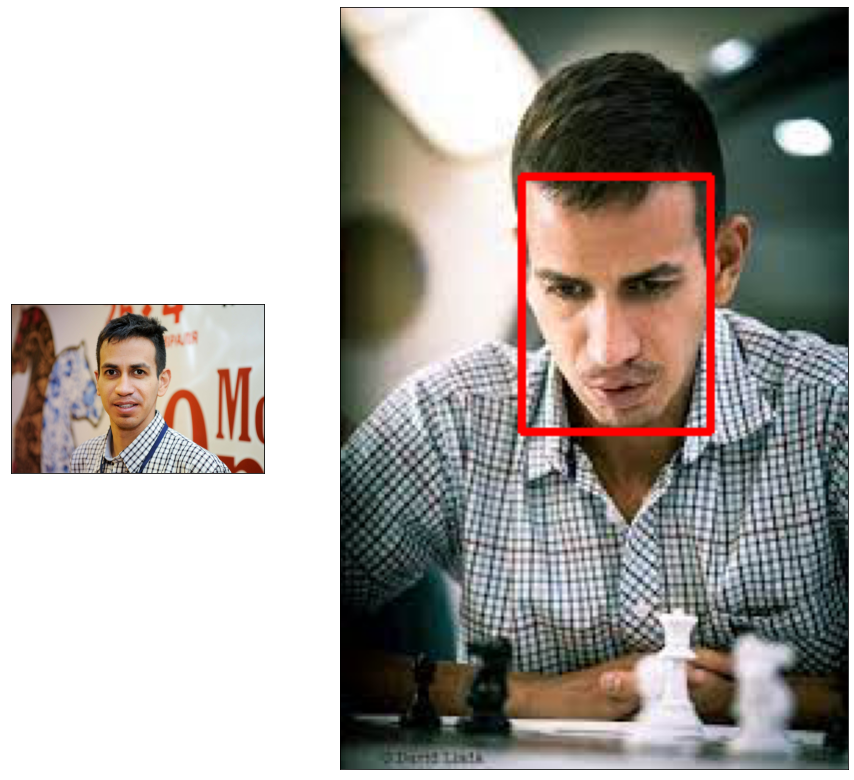

In [110]:
from matplotlib import gridspec
img1,img2=compareFaces(face_JuanOficial,list_of_images[4] )
plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])
#plt.subplot(1, 2, 1)
plt.subplot(gs[0])
plt.imshow(img1)
plt.xticks([])
plt.yticks([])
#plt.subplot(1, 2, 2)
plt.subplot(gs[1])
plt.imshow(img2)
plt.xticks([])
plt.yticks([])

##2. CON EL SIGUIENTE CÓDIGO PODEMOS CLASIFICAR LAS IMAGENES QUE CARGAN SIN ERRORES POR REKOGNITION Y QUE LUEGO HACEN MATCH CON NUESTRA IAMGEN FUENTE

In [122]:
list_Of_Matches = []
for image in list_of_images:
  try:
    image1=openImage(face_JuanOficial)
    image2=openImage(image)
    response=client.compare_faces(TargetImage={'Bytes': image2}, SourceImage={'Bytes': image1})
    if len(response['FaceMatches']) == 0:
      print(f'{image} MATCH NOT FOUND')
    else:
      list_Of_Matches.append(image)
      print(f'{image} MATCH FOUND ')
  except:
    print('An exception occurred')

An exception occurred
An exception occurred
/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave3.jpg MATCH NOT FOUND
/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave4.jpg MATCH NOT FOUND
/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave5.jpg MATCH FOUND 
/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave6.jpg MATCH FOUND 
/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave7.jpg MATCH NOT FOUND
/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave8.jpg MATCH NOT FOUND
/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave9.jpg MATCH NOT FOUND
/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave10.jpg MATCH NOT FOUND
/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave11.jpg MATCH NOT FOUND
/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave12.jpg MATCH NOT FOUND
/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave13.jpg MATCH FOUND 
/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave14.jpg MATCH NOT FOUND
An exception occurred
/content/drive/MyDrive/ScrapingJuanCar

##3. LA SIGUIENTE ES LA LISTA DE IMAGENES QUE TIENEN COINCIDENCIA CON LAS IMAGEN FUENTE

In [123]:
list_Of_Matches

['/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave5.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave6.jpg',
 '/content/drive/MyDrive/ScrapingJuanCarlos/imagetoSave13.jpg']

##4. MOSTRAMOS LAS IMAGENES QUE REPORTAN COINCIDENCIA 

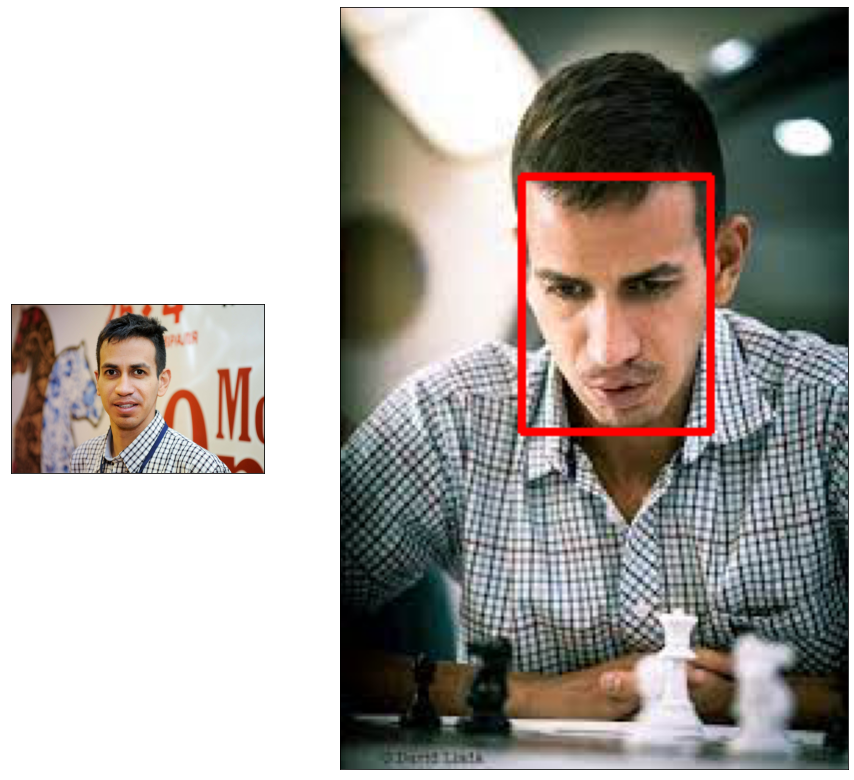

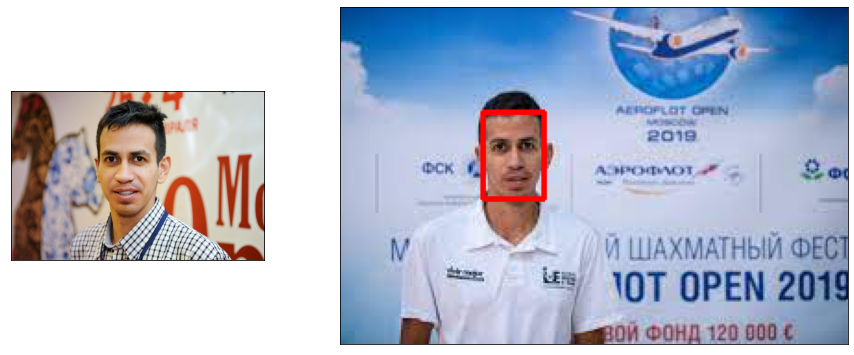

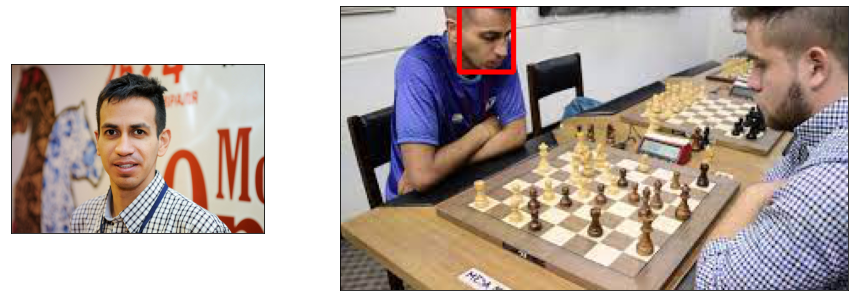

In [124]:
for images in list_Of_Matches:
  img1,img2=compareFaces(face_JuanOficial,images)
  plt.figure(figsize=(15,15))
  gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])
  #plt.subplot(1, 2, 1)
  plt.subplot(gs[0])
  plt.imshow(img1)
  plt.xticks([])
  plt.yticks([])
  #plt.subplot(1, 2, 2)
  plt.subplot(gs[1])
  plt.imshow(img2)
  plt.xticks([])
  plt.yticks([])